Source : https://github.com/AmeyaJagtap/XPINNs


In [ ]:
!git clone https://github.com/AmeyaJagtap/XPINNs.git

Cloning into 'XPINNs'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 99 (delta 26), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (99/99), done.


In [ ]:
!unzip "/content/XPINNs/XPINN_Code.zip" -d "/content/"
!cp -a /content/XPINN_Code/DATA/. /content/

Archive:  /content/XPINNs/XPINN_Code.zip
   creating: /content/XPINN_Code/
   creating: /content/XPINN_Code/DATA/
  inflating: /content/XPINN_Code/DATA/XPINN_2D_PoissonEqn.mat  
   creating: /content/XPINN_Code/Utilities/
  inflating: /content/XPINN_Code/Utilities/plotting.py  
   creating: /content/XPINN_Code/Utilities/__pycache__/
  inflating: /content/XPINN_Code/Utilities/__pycache__/plotting.cpython-35.pyc  
  inflating: /content/XPINN_Code/Utilities/__pycache__/plotting.cpython-37.pyc  
  inflating: /content/XPINN_Code/Utilities/__pycache__/plotting.cpython-36.pyc  
   creating: /content/XPINN_Code/XPINN_Src/
   creating: /content/XPINN_Code/XPINN_Src/figures/
  inflating: /content/XPINN_Code/XPINN_Src/figures/XPINN_PoissonEq_Err.pdf  
  inflating: /content/XPINN_Code/XPINN_Src/figures/XPINN_PoissonEq_ExSol.pdf  
  inflating: /content/XPINN_Code/XPINN_Src/figures/XPINN_PoissonEq_Sol.pdf  
  inflating: /content/XPINN_Code/XPINN_Src/figures/XPINN_Poisson_dataPts.pdf  
  inflating: /

In [ ]:
!pip install latex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7604 sha256=8a3543ec9d838fa08582cc2500e58fb62b94a4b44439654226698bb58f97b937
  Stored in directory: /root/.cache/pip/wheels/57/d6/11/5d5718227890d9e479b6137cb406410c37a0b84b2ab35b872b
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7247 sha256=21afe24dd60229d88ac5d3fef0c72cbed3ebdafa3add5fdd5d9774058e3981b0
  Stored in directory: /root/.cache/pip/wheels/28/76/4b/7db27e02c1de4d2181559d108fcdfed1680ff7d3534553d460
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2781 sha256=a5ae27c3ba1cf4dfa96c62a0a7350418ebc44fd78e0a843c8388b116e1e7cfba
  Stored in directory: /root/.cache/pip/wheels/4c/c0/ce/5a47f35186acbe73e38811df30daaf798c81a7599bb2d5995a
  Created wheel for tempdir: filename=tempdir-0.7.1-py3-none-any.whl size=2214 sha256=543c358ea439d0a911b687647892288bffcc246f2223a

Utility functions

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct  9 20:11:57 2017

@author: mraissi
"""

import numpy as np
import matplotlib as mpl
#mpl.use('pgf')

def figsize(scale, nplots = 1):
    fig_width_pt = 390.0                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = nplots*fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": False,                # use LaTeX to write all text #Disabled because it does not work
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(1.0),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }
mpl.rcParams.update(pgf_with_latex)

import matplotlib.pyplot as plt

# I make my own newfig and savefig functions
def newfig(width, nplots = 1):
    fig = plt.figure(figsize=figsize(width, nplots))
    ax = fig.add_subplot(111)
    return fig, ax

def savefig(filename, crop = True):
    if crop == True:
#        plt.savefig('{}.pgf'.format(filename), bbox_inches='tight', pad_inches=0)
        plt.savefig('{}.pdf'.format(filename), bbox_inches='tight', pad_inches=0)
        plt.savefig('{}.eps'.format(filename), bbox_inches='tight', pad_inches=0)
    else:
#        plt.savefig('{}.pgf'.format(filename))
        plt.savefig('{}.pdf'.format(filename))
        plt.savefig('{}.eps'.format(filename))

## Simple plot
#fig, ax  = newfig(1.0)
#
#def ema(y, a):
#    s = []
#    s.append(y[0])
#    for t in range(1, len(y)):
#        s.append(a * y[t] + (1-a) * s[t-1])
#    return np.array(s)
#    
#y = [0]*200
#y.extend([20]*(1000-len(y)))
#s = ema(y, 0.01)
#
#ax.plot(s)
#ax.set_xlabel('X Label')
#ax.set_ylabel('EMA')
#
#savefig('ema')

Execute

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat May  9 14:45:39 2020


@author: Dr. Ameya D.Jagtap, 
         Division of Applied Mathematics,
         Brown University, USA.

        Emails: ameyadjagtap@gmail.com, ameya_jagtap@brown.edu
        Website:  https://sites.google.com/view/ameyadjagtap

XPINN:

     We propose a generalized space-time domain decomposition approach for the physics-informed neural networks (PINNs) to 
     solve nonlinear partial differential equations (PDEs) on arbitrary complex-geometry domains. The proposed framework,
     named eXtended PINNs (XPINNs), further pushes the boundaries of both PINNs as well as conservative PINNs (cPINNs), 
     which is a recently proposed domain decomposition approach in the PINN framework tailored to conservation laws. Compared 
     to PINN, the XPINN method has large representation and parallelization capacity due to the inherent property of 
     deployment of multiple neural networks in the smaller sub-domains. Unlike cPINN, XPINN can be extended to any type 
     of PDEs. Moreover, the domain can be decomposed in any arbitrary way (in space and time), which is not possible in 
     cPINN. Thus, XPINN offers both space and time parallelization, thereby reducing the training cost more effectively.


References: 
    
    1. A.D. Jagtap, G.E.Karniadakis, Extended physics-informed neural networks (XPINNs): A generalized space-time
    domain decomposition based deep learning framework for nonlinear partial differential equations,
    Communications in Computational Physics, doi: 10.4208/cicp.OA-2020-0164.

    2. A.D.Jagtap, E. Kharazmi, G.E.Karniadakis, Conservative physics-informed neural networks on discrete domains
    for conservation laws: Applications to forward and inverse problems, Computer Methods in Applied Mechanics and 
    Engineering, 365, 113028 (2020).
    
    3. A.D.Jagtap, K.Kawaguchi, G.E.Karniadakis, Locally adaptive activation functions with slope recovery for deep
    and physics-informed neural networks, Proceedings of the Royal Society A: Mathematical, Physical and Engineering Sciences,
    20200334, 2020. (http://dx.doi.org/10.1098/rspa.2020.0334).
    

Example:
    
    Reference paepr 1, Test case 4.2, 2D Poisson's equation.
    
Licensing: 
    
    This code free for all. Please cite our work if you find this code helpful in your research/industrial/educational work.



"""

import sys
sys.path.insert(0, '../Utilities/')

#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
# from scipy.interpolate import griddata
# from pyDOE import lhs
#from plotting import newfig, savefig
# from mpl_toolkits.mplot3d import Axes3D
import time
import matplotlib.tri as tri
import matplotlib.gridspec as gridspec
# from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Polygon

np.random.seed(1234)
tf.random.set_random_seed(1234)

class XPINN:
    # Initialize the class
    def __init__(self, X_ub ,ub, X_f1, X_f2, X_f3, X_fi1, X_fi2, layers1, layers2, layers3):

    
        self.x_ub = X_ub[:,0:1]
        self.y_ub = X_ub[:,1:2]
        self.ub = ub

        self.x_f1 = X_f1[:,0:1]
        self.y_f1 = X_f1[:,1:2]
        self.x_f2 = X_f2[:,0:1]
        self.y_f2 = X_f2[:,1:2]
        self.x_f3 = X_f3[:,0:1]
        self.y_f3 = X_f3[:,1:2]
        self.x_fi1 = X_fi1[:,0:1]
        self.y_fi1 = X_fi1[:,1:2]
        self.x_fi2 = X_fi2[:,0:1]
        self.y_fi2 = X_fi2[:,1:2]

        self.layers1 = layers1
        self.layers2 = layers2
        self.layers3 = layers3
        
        # Initialize NNs
        self.weights1, self.biases1, self.A1 = self.initialize_NN(layers1)
        self.weights2, self.biases2, self.A2 = self.initialize_NN(layers2)    
        self.weights3, self.biases3, self.A3 = self.initialize_NN(layers3)
        
        # tf placeholders and graph
        self.sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True,
                                                     log_device_placement=True))
        
        self.x_ub_tf  = tf.placeholder(tf.float64, shape=[None, self.x_ub.shape[1]])
        self.y_ub_tf  = tf.placeholder(tf.float64, shape=[None, self.y_ub.shape[1]]) 
        
        self.x_f1_tf  = tf.placeholder(tf.float64, shape=[None, self.x_f1.shape[1]])
        self.y_f1_tf  = tf.placeholder(tf.float64, shape=[None, self.y_f1.shape[1]])
        self.x_f2_tf  = tf.placeholder(tf.float64, shape=[None, self.x_f2.shape[1]])
        self.y_f2_tf  = tf.placeholder(tf.float64, shape=[None, self.y_f2.shape[1]]) 
        self.x_f3_tf  = tf.placeholder(tf.float64, shape=[None, self.x_f3.shape[1]])
        self.y_f3_tf  = tf.placeholder(tf.float64, shape=[None, self.y_f3.shape[1]]) 
        self.x_fi1_tf = tf.placeholder(tf.float64, shape=[None, self.x_fi1.shape[1]])
        self.y_fi1_tf = tf.placeholder(tf.float64, shape=[None, self.y_fi1.shape[1]]) 
        self.x_fi2_tf = tf.placeholder(tf.float64, shape=[None, self.x_fi2.shape[1]])
        self.y_fi2_tf = tf.placeholder(tf.float64, shape=[None, self.y_fi2.shape[1]])         
                
        self.ub1_pred  = self.net_u1(self.x_ub_tf, self.y_ub_tf)
        self.ub2_pred  = self.net_u2(self.x_f2_tf, self.y_f2_tf)
        self.ub3_pred  = self.net_u3(self.x_f3_tf, self.y_f3_tf)
        
        self.f1_pred, self.f2_pred,self.f3_pred, self.fi1_pred, self.fi2_pred,\
            self.uavgi1_pred,self.uavgi2_pred, self.u1i1_pred,  self.u1i2_pred, self.u2i1_pred, self.u3i2_pred \
            = self.net_f(self.x_f1_tf, self.y_f1_tf, self.x_f2_tf, self.y_f2_tf, self.x_f3_tf, self.y_f3_tf, self.x_fi1_tf, self.y_fi1_tf, self.x_fi2_tf, self.y_fi2_tf)         
        
        self.loss1 = 20*tf.reduce_mean(tf.square(self.ub - self.ub1_pred)) \
                        + tf.reduce_mean(tf.square(self.f1_pred)) + 1*tf.reduce_mean(tf.square(self.fi1_pred))\
                        + 1*tf.reduce_mean(tf.square(self.fi2_pred))\
                        + 20*tf.reduce_mean(tf.square(self.u1i1_pred-self.uavgi1_pred))\
                        + 20*tf.reduce_mean(tf.square(self.u1i2_pred-self.uavgi2_pred))
                
        self.loss2 = tf.reduce_mean(tf.square(self.f2_pred)) + 1*tf.reduce_mean(tf.square(self.fi1_pred))\
                            + 20*tf.reduce_mean(tf.square(self.u2i1_pred-self.uavgi1_pred))  
                            
        self.loss3 = tf.reduce_mean(tf.square(self.f3_pred)) + 1*tf.reduce_mean(tf.square(self.fi2_pred))\
                            + 20*tf.reduce_mean(tf.square(self.u3i2_pred-self.uavgi2_pred))                
                
        # self.optimizer = tf.contrib.opt.ScipyOptimizerInterface(self.loss, 
        #                                                         method = 'L-BFGS-B', 
        #                                                         options = {'maxiter': 5000,
        #                                                                    'maxfun': 5000,
        #                                                                    'maxcor': 50,
        #                                                                    'maxls': 50,
        #                                                                    'ftol' : 1.0 * np.finfo(float).eps})
        self.optimizer_Adam = tf.train.AdamOptimizer(0.0008)
        self.train_op_Adam1 = self.optimizer_Adam.minimize(self.loss1) 
        self.train_op_Adam2 = self.optimizer_Adam.minimize(self.loss2)   
        self.train_op_Adam3 = self.optimizer_Adam.minimize(self.loss3)
        
        init = tf.global_variables_initializer()
        self.sess.run(init)

                
    def initialize_NN(self, layers):        
        weights = []
        biases = []
        A = []
        num_layers = len(layers) 
        for l in range(0,num_layers-1):
            W = self.xavier_init(size=[layers[l], layers[l+1]])
            b = tf.Variable(tf.zeros([1,layers[l+1]], dtype=tf.float64), dtype=tf.float64)
            a = tf.Variable(0.05, dtype=tf.float64)
            weights.append(W)
            biases.append(b)  
            A.append(a)
            
        return weights, biases, A
        
    def xavier_init(self, size):
        in_dim = size[0]
        out_dim = size[1]        
        xavier_stddev = np.sqrt(2/(in_dim + out_dim))
        return tf.Variable(tf.to_double(tf.truncated_normal([in_dim, out_dim], stddev=xavier_stddev)), dtype=tf.float64)
    
    def neural_net_tanh(self, X, weights, biases, A):
        num_layers = len(weights) + 1
        
        H = X 
        for l in range(0,num_layers-2):
            W = weights[l]
            b = biases[l]
            H = tf.tanh(20*A[l]*tf.add(tf.matmul(H, W), b)) 
        W = weights[-1]
        b = biases[-1]
        Y = tf.add(tf.matmul(H, W), b)
        return Y
    
    def neural_net_sin(self, X, weights, biases, A):
        num_layers = len(weights) + 1
        
        H = X 
        for l in range(0,num_layers-2):
            W = weights[l]
            b = biases[l]
            H = tf.sin(20*A[l]*tf.add(tf.matmul(H, W), b))
        W = weights[-1]
        b = biases[-1]
        Y = tf.add(tf.matmul(H, W), b)
        return Y
    
    def neural_net_cos(self, X, weights, biases, A):
        num_layers = len(weights) + 1
        
        H = X 
        for l in range(0,num_layers-2):
            W = weights[l]
            b = biases[l]
            H = tf.cos(20*A[l]*tf.add(tf.matmul(H, W), b))
        W = weights[-1]
        b = biases[-1]
        Y = tf.add(tf.matmul(H, W), b)
        return Y
            
    def net_u1(self, x, y):
        u = self.neural_net_tanh(tf.concat([x,y],1), self.weights1, self.biases1, self.A1)
        return u
    
    def net_u2(self, x, y):
        u = self.neural_net_sin(tf.concat([x,y],1), self.weights2, self.biases2, self.A2)
        return u
    
    def net_u3(self, x, y):
        u = self.neural_net_cos(tf.concat([x,y],1), self.weights3, self.biases3, self.A3)
        return u
    
    def net_f(self, x1, y1, x2, y2, x3, y3, xi1, yi1, xi2, yi2):
        
        # Sub-Net1
        u1    = self.net_u1(x1,y1)
        u1_x  = tf.gradients(u1, x1)[0]
        u1_y  = tf.gradients(u1, y1)[0]
        u1_xx = tf.gradients(u1_x, x1)[0]
        u1_yy = tf.gradients(u1_y, y1)[0]
        
        # Sub-Net2
        u2    = self.net_u2(x2,y2)
        u2_x  = tf.gradients(u2, x2)[0]
        u2_y  = tf.gradients(u2, y2)[0]
        u2_xx = tf.gradients(u2_x, x2)[0]
        u2_yy = tf.gradients(u2_y, y2)[0]
        
        # Sub-Net3
        u3    = self.net_u3(x3,y3)
        u3_x  = tf.gradients(u3, x3)[0]
        u3_y  = tf.gradients(u3, y3)[0]
        u3_xx = tf.gradients(u3_x, x3)[0]
        u3_yy = tf.gradients(u3_y, y3)[0]
        
        # Sub-Net1, Interface 1
        u1i1    = self.net_u1(xi1,yi1)
        u1i1_x  = tf.gradients(u1i1, xi1)[0]
        u1i1_y  = tf.gradients(u1i1, yi1)[0]
        u1i1_xx = tf.gradients(u1i1_x, xi1)[0]
        u1i1_yy = tf.gradients(u1i1_y, yi1)[0]
        
        # Sub-Net2, Interface 1
        u2i1    = self.net_u2(xi1,yi1)
        u2i1_x  = tf.gradients(u2i1, xi1)[0]
        u2i1_y  = tf.gradients(u2i1, yi1)[0]
        u2i1_xx = tf.gradients(u2i1_x, xi1)[0]
        u2i1_yy = tf.gradients(u2i1_y, yi1)[0]
        
        # Sub-Net1, Interface 2
        u1i2    = self.net_u1(xi2,yi2)
        u1i2_x  = tf.gradients(u1i2, xi2)[0]
        u1i2_y  = tf.gradients(u1i2, yi2)[0]
        u1i2_xx = tf.gradients(u1i2_x, xi2)[0]
        u1i2_yy = tf.gradients(u1i2_y, yi2)[0]
        
        # Sub-Net3, Interface 2
        u3i2    = self.net_u3(xi2,yi2)
        u3i2_x  = tf.gradients(u3i2, xi2)[0]
        u3i2_y  = tf.gradients(u3i2, yi2)[0]
        u3i2_xx = tf.gradients(u3i2_x, xi2)[0]
        u3i2_yy = tf.gradients(u3i2_y, yi2)[0]
    
        
        # Average value (Required for enforcing the average solution along the interface)
        uavgi1 = (u1i1 + u2i1)/2  
        uavgi2 = (u1i2 + u3i2)/2

        # Residuals
        f1 = u1_xx + u1_yy - (tf.exp(x1) + tf.exp(y1))
        f2 = u2_xx + u2_yy - (tf.exp(x2) + tf.exp(y2))
        f3 = u3_xx + u3_yy - (tf.exp(x3) + tf.exp(y3))
        
        # Residual continuity conditions on the interfaces
        fi1 = (u1i1_xx + u1i1_yy - (tf.exp(xi1) + tf.exp(yi1))) - (u2i1_xx + u2i1_yy - (tf.exp(xi1) + tf.exp(yi1))) 
        fi2 = (u1i2_xx + u1i2_yy - (tf.exp(xi2) + tf.exp(yi2))) - (u3i2_xx + u3i2_yy - (tf.exp(xi2) + tf.exp(yi2))) 

        return   f1, f2, f3, fi1, fi2, uavgi1, uavgi2, u1i1, u1i2, u2i1, u3i2
    
    def callback(self, loss):
        print(loss)
  
    def train(self,nIter, X_star1,X_star2,X_star3, u_exact2, u_exact3):
          
 
        tf_dict = {self.x_ub_tf: self.x_ub, self.y_ub_tf: self.y_ub, self.x_f1_tf: self.x_f1,
                   self.y_f1_tf: self.y_f1, self.x_f2_tf: self.x_f2, self.y_f2_tf: self.y_f2,
                   self.x_f3_tf: self.x_f3, self.y_f3_tf: self.y_f3, self.x_fi1_tf: self.x_fi1,
                   self.y_fi1_tf: self.y_fi1, self.x_fi2_tf: self.x_fi2, self.y_fi2_tf: self.y_fi2}
        
        MSE_history1=[]
        MSE_history2=[]
        MSE_history3=[]
        l2_err2=[]
        l2_err3=[]

        for it in range(nIter):
            self.sess.run(self.train_op_Adam1, tf_dict)
            self.sess.run(self.train_op_Adam2, tf_dict)
            self.sess.run(self.train_op_Adam3, tf_dict)
            
            if it %20 == 0:
                #elapsed = time.time() - start_time
                loss1_value = self.sess.run(self.loss1, tf_dict)
                loss2_value = self.sess.run(self.loss2, tf_dict)
                loss3_value = self.sess.run(self.loss3, tf_dict)
 
                # Predicted solution
                u_pred1, u_pred2, u_pred3 = model.predict(X_star1,X_star2,X_star3)

                # Relative L2 error in subdomains 2 and 3
                l2_error2 =  np.linalg.norm(u_exact2-u_pred2,2)/np.linalg.norm(u_exact2,2)
                l2_error3 =  np.linalg.norm(u_exact3-u_pred3,2)/np.linalg.norm(u_exact3,2)

                print('It: %d, Loss1: %.3e, Loss2: %.3e, Loss3: %.3e, L2_err2: %.3e, L2_err3: %.3e' % 
                      (it, loss1_value, loss2_value, loss3_value, l2_error2, l2_error3))

               #start_time = time.time()
                MSE_history1.append(loss1_value)
                MSE_history2.append(loss2_value)
                MSE_history3.append(loss3_value)
                l2_err2.append(l2_error2)
                l2_err3.append(l2_error3)

        
        return MSE_history1, MSE_history2, MSE_history3, l2_err2, l2_err3
                    
        # self.optimizer.minimize(self.sess, 
        #                         feed_dict = tf_dict,         
        #                         fetches = [self.loss], 
        #                         loss_callback = self.callback)        
                                    
    
    def predict(self, X_star1, X_star2, X_star3):
                
        u_star1 = self.sess.run(self.ub1_pred, {self.x_ub_tf: X_star1[:,0:1], self.y_ub_tf: X_star1[:,1:2]})  
        u_star2 = self.sess.run(self.ub2_pred, {self.x_f2_tf: X_star2[:,0:1], self.y_f2_tf: X_star2[:,1:2]})
        u_star3 = self.sess.run(self.ub3_pred, {self.x_f3_tf: X_star3[:,0:1], self.y_f3_tf: X_star3[:,1:2]})
        
        return u_star1, u_star2, u_star3
    
if __name__ == "__main__": 
     

    # Boundary points from subdomian 1
    N_ub   = 200
    
    # Residual points in three subdomains
    N_f1   = 5000
    N_f2   = 1800
    N_f3   = 1200
    
    # Interface points along the two interfaces
    N_I1   = 100
    N_I2   = 100
    
    # NN architecture in each subdomain
    layers1 = [2, 30, 30, 1]
    layers2 = [2, 20, 20, 20, 20, 1]
    layers3 = [2, 25, 25, 25, 1]
    
    # Load training data (boundary points), residual and interface points from .mat file
    # All points are generated in Matlab
    data = scipy.io.loadmat('../content/XPINN_2D_PoissonEqn.mat')
    

    x_f1 = data['x_f1'].flatten()[:,None]
    y_f1 = data['y_f1'].flatten()[:,None]
    x_f2 = data['x_f2'].flatten()[:,None]
    y_f2 = data['y_f2'].flatten()[:,None]
    x_f3 = data['x_f3'].flatten()[:,None]
    y_f3 = data['y_f3'].flatten()[:,None]
    xi1  = data['xi1'].flatten()[:,None]
    yi1  = data['yi1'].flatten()[:,None]
    xi2  = data['xi2'].flatten()[:,None]
    yi2  = data['yi2'].flatten()[:,None]
    xb   = data['xb'].flatten()[:,None]
    yb   = data['yb'].flatten()[:,None]

    
    ub_train  = data['ub'].flatten()[:,None]
    u_exact = data['u_exact'].flatten()[:,None]
    u_exact2 = data['u_exact2'].flatten()[:,None]
    u_exact3 = data['u_exact3'].flatten()[:,None]
    
    X_f1_train = np.hstack((x_f1.flatten()[:,None], y_f1.flatten()[:,None]))
    X_f2_train = np.hstack((x_f2.flatten()[:,None], y_f2.flatten()[:,None]))
    X_f3_train = np.hstack((x_f3.flatten()[:,None], y_f3.flatten()[:,None]))

    X_fi1_train = np.hstack((xi1.flatten()[:,None], yi1.flatten()[:,None]))
    X_fi2_train = np.hstack((xi2.flatten()[:,None], yi2.flatten()[:,None]))

    
    X_ub_train = np.hstack((xb.flatten()[:,None], yb.flatten()[:,None]))

    # Points in the whole  domain
    x_total =  data['x_total'].flatten()[:,None] 
    y_total =  data['y_total'].flatten()[:,None]

    X_star1 = np.hstack((x_f1.flatten()[:,None], y_f1.flatten()[:,None]))
    X_star2 = np.hstack((x_f2.flatten()[:,None], y_f2.flatten()[:,None]))
    X_star3 = np.hstack((x_f3.flatten()[:,None], y_f3.flatten()[:,None]))

    # Randomly select the residual points from sub-domains
    idx1 = np.random.choice(X_f1_train.shape[0], N_f1, replace=False)    
    X_f1_train = X_f1_train[idx1,:]
    
    idx2 = np.random.choice(X_f2_train.shape[0], N_f2, replace=False)    
    X_f2_train = X_f2_train[idx2,:]
    
    idx3 = np.random.choice(X_f3_train.shape[0], N_f3, replace=False)    
    X_f3_train = X_f3_train[idx3,:]
    
    # Randomly select boundary points
    idx4 = np.random.choice(X_ub_train.shape[0], N_ub, replace=False)
    X_ub_train = X_ub_train[idx4,:]
    ub_train   = ub_train[idx4,:] 
    
    # Randomly select the interface points along two interfaces
    idxi1 = np.random.choice(X_fi1_train.shape[0], N_I1, replace=False)    
    X_fi1_train = X_fi1_train[idxi1,:]
    
    idxi2 = np.random.choice(X_fi2_train.shape[0], N_I2, replace=False)    
    X_fi2_train = X_fi2_train[idxi2,:]
   
    # XPINN model
    model = XPINN(X_ub_train ,ub_train,X_f1_train,X_f2_train,X_f3_train,\
                              X_fi1_train, X_fi2_train, layers1, layers2, layers3)
    
    # Training
    Max_iter = 501
    start_time = time.time()                
    MSE_hist1, MSE_hist2, MSE_hist3, l2_err2, l2_err3 = model.train(Max_iter, X_star1,X_star2,X_star3, u_exact2, u_exact3)
    elapsed = time.time() - start_time                
    print('Training time: %.4f' % (elapsed))
    
    # Solution prediction
    u_pred1, u_pred2, u_pred3 = model.predict(X_star1,X_star2,X_star3)
            
    #%% Needed for plotting
    X1, Y1 = X_star1[:,0:1], X_star1[:,1:2]
    triang_1 = tri.Triangulation(X1.flatten(), Y1.flatten())
    X2, Y2 = X_star2[:,0:1], X_star2[:,1:2]
    triang_2 = tri.Triangulation(X2.flatten(), Y2.flatten())
    X3, Y3 = X_star3[:,0:1], X_star3[:,1:2]
    triang_3 = tri.Triangulation(X3.flatten(), Y3.flatten())
    x_tot = np.concatenate([X1, X2, X3])
    y_tot = np.concatenate([Y1, Y2, Y3])
    triang_total = tri.Triangulation(x_tot.flatten(), y_tot.flatten())

    # Concatenating the solution from subdomains
    u_pred = np.concatenate([u_pred1, u_pred2, u_pred3])
           
    error_u_total = np.linalg.norm(np.squeeze(u_exact)-u_pred.flatten(),2)/np.linalg.norm(np.squeeze(u_exact),2)
    print('Error u_total: %e' % (error_u_total))     
    
    #%%    

    


Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Use `tf.cast` instead.
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0

It: 0, Loss1: 3.464e+02, Loss2: 2.927e+00, Loss3: 2.839e+01, L2_err2: 1.045e+00, L2_err3: 6.240e-01
It: 20, Loss1: 2.397e+02, Loss2: 2.185e+00, Loss3: 1.237e+01, L2_err2: 9.584e-01, L2_err3: 8.432e-01
It: 40, Loss1: 1.153e+02, Loss2: 2.233e+00, Loss3: 1.460e+01, L2_err2: 9.056e-01, L2_err3: 3.456e-01
It: 60, Loss1: 2.926e+01, Loss2: 3.327e+00, Loss3: 1.378e+01, L2_err2: 6.450e-01, L2_err3: 2.020e-01
It: 80, Loss1: 2.359e+01, Loss2: 3.210e+00, Loss3: 1.007e+01, L2_err2: 8.157e-01, L2_err3: 3.311e-01
It: 100, Loss1: 2.179e+01, Loss2: 3.007e+00, Loss3: 9.333e+00, L2_err2: 8.116e-01, L2_err3: 3.283e-01
It: 120, Loss1: 2.074e+01, Loss2: 2.881e+00, Loss3: 8.749e+00, L2_err2: 7.898e-01, L2_err3: 3.175e-01
It:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


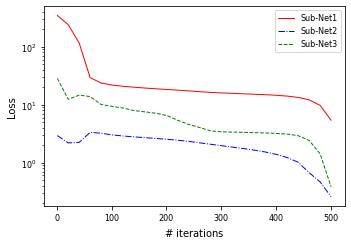

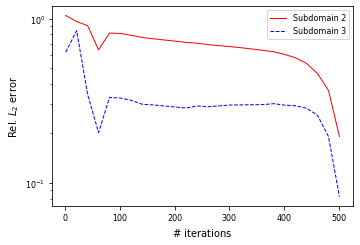

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


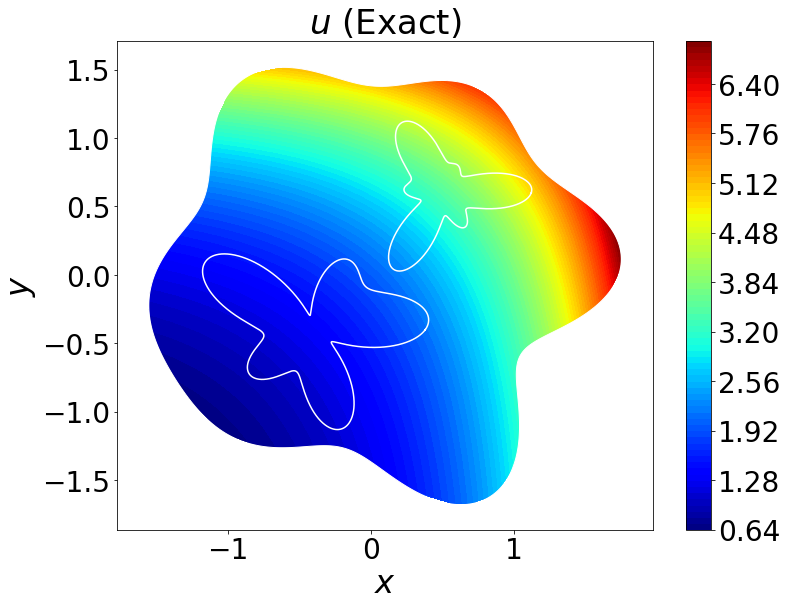

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


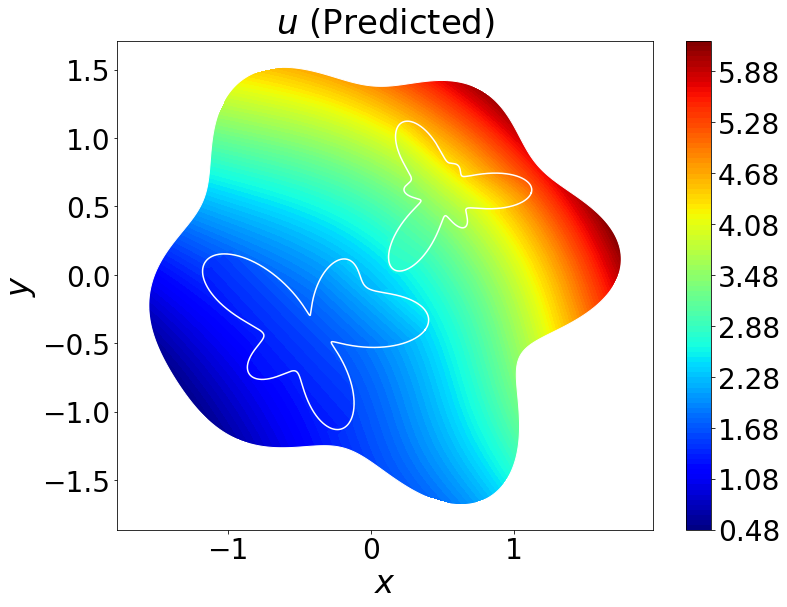

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


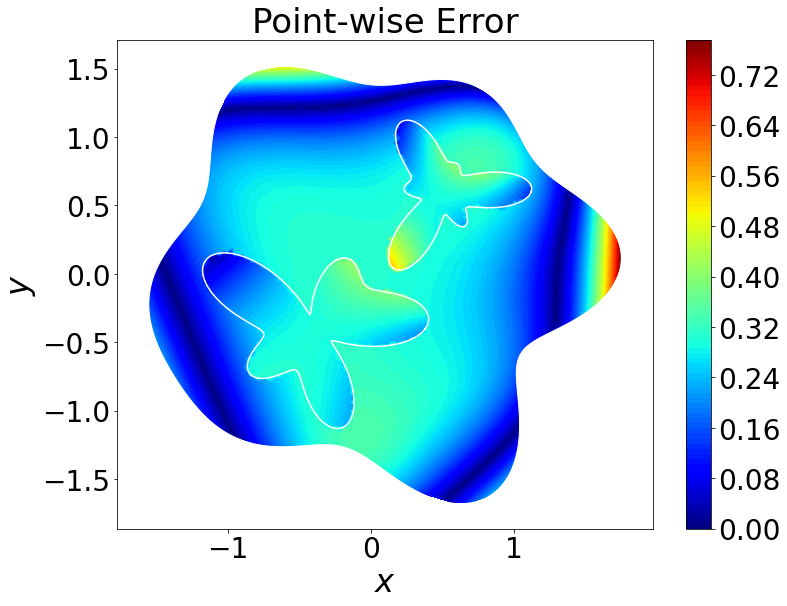

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


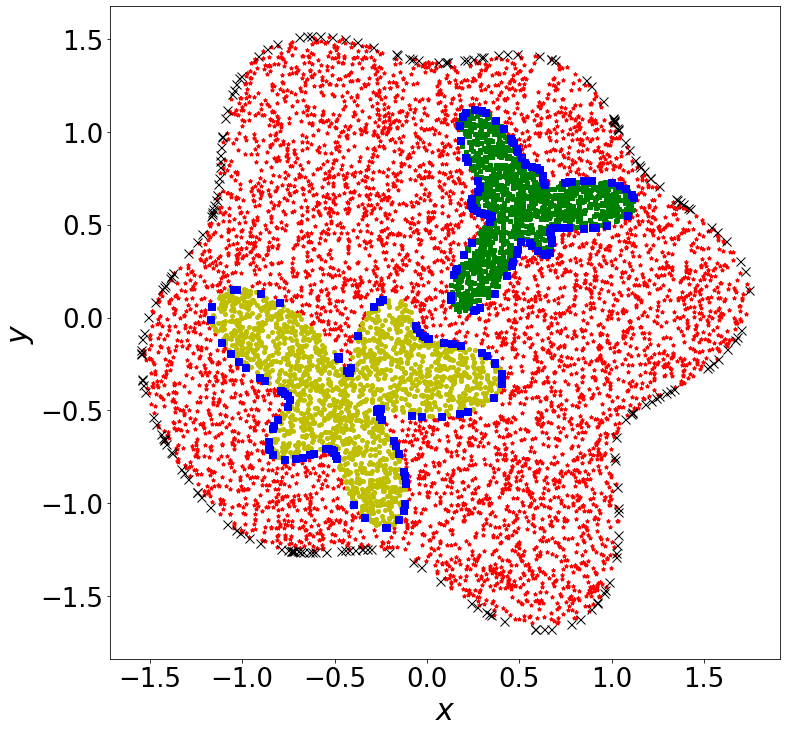

In [ ]:
if __name__ == "__main__": 
############################# Plotting ###############################
    fig, ax = newfig(1.0, 1.1)
    plt.plot(range(1,Max_iter+1,20), MSE_hist1,  'r-', linewidth = 1,label = 'Sub-Net1') 
    plt.plot(range(1,Max_iter+1,20), MSE_hist2,  'b-.', linewidth = 1, label = 'Sub-Net2') 
    plt.plot(range(1,Max_iter+1,20), MSE_hist3,  'g--', linewidth = 1, label = 'Sub-Net3') 
    plt.xlabel('$\#$ iterations')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.legend(loc='upper right')
    #savefig('./figures/XPINN_PoissonMSEhistory') 

    #%%
    fig, ax = newfig(1.0, 1.1)
    plt.plot(range(1,Max_iter+1,20), l2_err2,  'r-', linewidth = 1,label = 'Subdomain 2') 
    plt.plot(range(1,Max_iter+1,20), l2_err3,  'b--', linewidth = 1,label = 'Subdomain 3') 
    plt.xlabel('$\#$ iterations')
    plt.ylabel('Rel. $L_2$ error')
    plt.yscale('log')
    plt.legend(loc='upper right')
    #savefig('./figures/XPINN_PoissonErrhistory') 

    #%%
    aa1 = np.array([[np.squeeze(xb[-1]),np.squeeze(yb[-1])]])
    aa2 = np.array([[1.8,np.squeeze(yb[-1])], [+1.8,-1.7], [-1.6,-1.7], [-1.6,1.55], [1.8,1.55],[1.8,np.squeeze(yb[-1])]])
    x_domain1 = np.squeeze(xb.flatten()[:,None])
    y_domain1 = np.squeeze(yb.flatten()[:,None])
    aa3 = np.array([x_domain1,y_domain1]).T
    XX = np.vstack((aa3, aa2, aa1))
    triang_total = tri.Triangulation(x_tot.flatten(), y_tot.flatten())
 
    #%%
    X_fi1_train_Plot = np.hstack((xi1.flatten()[:,None], yi1.flatten()[:,None]))
    X_fi2_train_Plot = np.hstack((xi2.flatten()[:,None], yi2.flatten()[:,None]))
    
    fig, ax = newfig(1.0, 1.1)
    gridspec.GridSpec(1,1)
    ax = plt.subplot2grid((1,1), (0,0))
    tcf = ax.tricontourf(triang_total, np.squeeze(u_exact), 100 ,cmap='jet')
    ax.add_patch(Polygon(XX, closed=True, fill=True, color='w', edgecolor = 'w'))
    tcbar = fig.colorbar(tcf)
    tcbar.ax.tick_params(labelsize=28)
    ax.set_xlabel('$x$', fontsize = 32)
    ax.set_ylabel('$y$', fontsize = 32)
    ax.set_title('$u$ (Exact)', fontsize = 34)
    ax.tick_params(axis="x", labelsize = 28)
    ax.tick_params(axis="y", labelsize = 28)   
    plt.plot(X_fi1_train_Plot[:,0:1], X_fi1_train_Plot[:,1:2], 'w-', markersize =2, label='Interface Pts')
    plt.plot(X_fi2_train_Plot[:,0:1], X_fi2_train_Plot[:,1:2], 'w-', markersize =2, label='Interface Pts')

    #fig.tight_layout()
    fig.set_size_inches(w=12,h=9)
    #savefig('./figures/XPINN_PoissonEq_ExSol') 
    plt.show()  
        
    fig, ax = newfig(1.0, 1.1)
    gridspec.GridSpec(1,1)
    ax = plt.subplot2grid((1,1), (0,0))
    tcf = ax.tricontourf(triang_total, u_pred.flatten(), 100 ,cmap='jet')
    ax.add_patch(Polygon(XX, closed=True, fill=True, color='w', edgecolor = 'w'))
    tcbar = fig.colorbar(tcf)
    tcbar.ax.tick_params(labelsize=28)
    ax.set_xlabel('$x$', fontsize = 32)
    ax.set_ylabel('$y$', fontsize = 32)
    ax.set_title('$u$ (Predicted)', fontsize = 34)
    ax.tick_params(axis="x", labelsize = 28)
    ax.tick_params(axis="y", labelsize = 28)   
    plt.plot(X_fi1_train_Plot[:,0:1], X_fi1_train_Plot[:,1:2], 'w-', markersize =2, label='Interface Pts')
    plt.plot(X_fi2_train_Plot[:,0:1], X_fi2_train_Plot[:,1:2], 'w-', markersize =2, label='Interface Pts')
    #fig.tight_layout()
    fig.set_size_inches(w=12,h=9)
    #savefig('./figures/XPINN_PoissonEq_Sol') 
    plt.show()  
 


    fig, ax = newfig(1.0, 1.1)
    gridspec.GridSpec(1,1)
    ax = plt.subplot2grid((1,1), (0,0))
    tcf = ax.tricontourf(triang_total, abs(np.squeeze(u_exact)-u_pred.flatten()), 100 ,cmap='jet')
    ax.add_patch(Polygon(XX, closed=True, fill=True, color='w', edgecolor = 'w'))   
    tcbar = fig.colorbar(tcf)  
    tcbar.ax.tick_params(labelsize=28)
    ax.set_xlabel('$x$', fontsize = 32)
    ax.set_ylabel('$y$', fontsize = 32)
    ax.set_title('Point-wise Error', fontsize = 34)
    ax.tick_params(axis="x", labelsize = 28)
    ax.tick_params(axis="y", labelsize = 28)   
    plt.plot(X_fi1_train_Plot[:,0:1], X_fi1_train_Plot[:,1:2], 'w-', markersize =2, label='Interface Pts')
    plt.plot(X_fi2_train_Plot[:,0:1], X_fi2_train_Plot[:,1:2], 'w-', markersize =2, label='Interface Pts')
    #fig.tight_layout()
    fig.set_size_inches(w=12,h=9)
    #savefig('./figures/XPINN_PoissonEq_Err') 
    plt.show()  
        
        
#%%  
    fig, ax = newfig(1.0, 1.1)
    gridspec.GridSpec(1,1)   
    ax = plt.subplot2grid((1,1), (0,0))
    plt.plot(X_f1_train[:,0:1], X_f1_train[:,1:2], 'r*', markersize =4, label='Residual Pts  (sub-domain 1)')
    plt.plot(X_f2_train[:,0:1], X_f2_train[:,1:2], 'yo', markersize =4, label='Residual Pts (sub-domain 2)')
    plt.plot(X_f3_train[:,0:1], X_f3_train[:,1:2], 'gs', markersize =4, label='Residual Pts (sub-domain 3)')
    plt.plot(X_fi1_train[:,0:1], X_fi1_train[:,1:2], 'bs', markersize =7, label='Interface Pts 1')
    plt.plot(X_fi2_train[:,0:1], X_fi2_train[:,1:2], 'bs', markersize =7, label='Interface Pts 1')
    plt.plot(X_ub_train[:,0:1], X_ub_train[:,1:2], 'kx', markersize =9, label='Interface Pts 1')
    ax.set_xlabel('$x$', fontsize = 30)
    ax.set_ylabel('$y$', fontsize = 30)
    ax.tick_params(axis="x", labelsize = 26)
    ax.tick_params(axis="y", labelsize = 26)  
    #fig.tight_layout()
    fig.set_size_inches(w=12,h=12)
    #savefig('./figures/XPINN_Poisson_dataPts') 
    plt.show() 
